# MNIST 데이터셋을 활용한 손글씨 (0~9) 예측하는 다중분류

## MNIST 데이터셋 준비하기

In [ ]:
from keras.datasets.mnist import load_data

# 케라스 저장소에서 데이터 다운로드
(X_train, y_train), (X_test, y_test) = load_data(path='minist.npz') # return 은 함수에서 정함 (제공하도록)

## MNIST 데이터 형태 확인하기

### 훈련 데이터셋

In [ ]:
print('X_train.shape : ', X_train.shape) # 이차원형태 28,28 의 feature
print('y_train.shape : ', y_train.shape) # target 값이 하나 -> 답 !
print('y_train : ', y_train) # 숫자값이 들어있음

X_train.shape :  (60000, 28, 28)
y_train.shape :  (60000,)
y_train :  [5 0 4 ... 5 6 8]


In [ ]:
print(X_train[0]) # 5 -> 수치적으로 예측

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### 테스트 데이터셋

In [ ]:
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)
print('y_test : ', y_test)

X_test.shape :  (10000, 28, 28)
y_test.shape :  (10000,)
y_test :  [7 2 1 ... 4 5 6]


### 데이터 그려보기

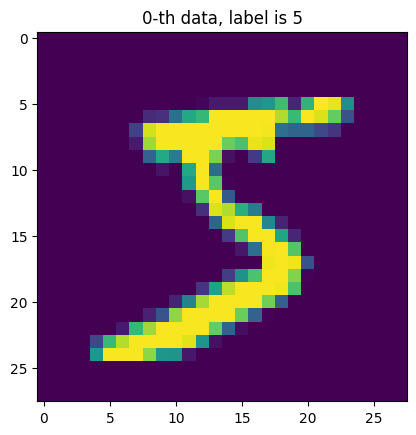

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# 0번째에 위치한
idx = 0
img = X_train[idx, :]
label = y_train[idx]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' %(idx, label))
plt.show()

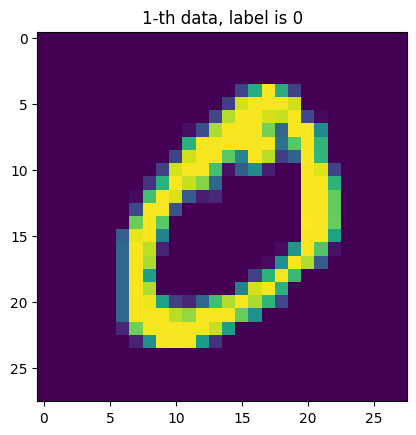

In [ ]:
# 1번째에 위치한
idx = 1
img = X_train[idx, :] # 이차원
label = y_train[idx]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' %(idx, label))
plt.show() # 확인 작업은 항상 필수 -> 당연히 내가 어떤 데이터를 분석할지 알아야함. 어떤 스타일인지 등을 확인해야함

## 검증 데이터셋 만들기

In [ ]:
# 훈련데이터 안에서 해결해야하는 것이 원칙
# 훈련데이터셋 -> 훈련 (70%), 검증(30%) 비율로 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 7)
print('X_train.sheap : ', X_train.shape)
print('X_val.sheap : ', X_val.shape)

X_train.sheap :  (42000, 28, 28)
X_val.sheap :  (18000, 28, 28)


In [ ]:
print('X_train.sheap : ', X_train.shape)
print('X_val.sheap : ', X_val.shape) # 확인 작업

X_train.sheap :  (42000, 28, 28)
X_val.sheap :  (18000, 28, 28)


## 모델 입력을 위한 데이터(손글씨) 전처리


*   2차원 배열(28,28) -> 1차원 배열(784)로 변경 :: 28*28 = 784
*   스케일링(범위축소) -> 0 ~ 255 -> 0 ~ 1



### 2차원 배열에서 1차원 배열로 변경

In [ ]:
# 이차원으로는 학습 불가 (Dense 층) -> 전처리 진행
num_x_train = X_train.shape[0] # print(num_x_train)를 하면 42000이 출력
num_x_val = X_val.shape[0] # 18000
num_x_test = X_test.shape[0] # 10000

print(num_x_train, num_x_val, num_x_test)

42000 18000 10000


In [ ]:
X_train = X_train.reshape((num_x_train, 28 * 28)) # 1차원으로, 축정보는 사라지지만 픽셀 정보는 사라지지않는다.
X_train.shape

(42000, 784)

In [ ]:
X_val = X_val.reshape((num_x_val, 28 * 28)) # 1차원으로
X_val.shape

(18000, 784)

In [ ]:
X_test = X_test.reshape((num_x_test, 28 * 28)) # 1차원으로
X_test.shape

(10000, 784)

### 데이터 스케일링 (범위 축소)

*  normalization = 정규화
*  standardization = 표준화


In [ ]:
# 데이터의 범위가 동일 (0~255) -> (0~1) :: 표준환 MixMax 알고리즘 사용가능

X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

print(X_train[0])

## 모델 입력을 위한 레이블 (정답) 전처리

In [ ]:
from keras.utils import to_categorical

print(y_train.shape, y_train[0])

# 수치형 데이터 (0~9) -> 범주형 데이터 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train.shape, y_train[0]) # 위의 print 문과 비교작업

(42000,) 1
(42000, 10) [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 모델 구성하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape=(784, ))) # 첫번째 레이어 -> 반드시 입력을 넣어줘야함
model.add(Dense(32, activation = 'relu')) # hidden layer
model.add(Dense(10, activation = 'softmax')) # 마지막 레이어 -> 출력 (레이블 shape과 동일) :: array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]
# 다중 분류 시 마지막 레이어 활성함수는 softmax !

## 모델 설정하기

In [ ]:
model.compile(optimizer='adam', # 옵티마이저
              loss = 'categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

## 모델 학습하기

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 7s 11ms/step - loss: 0.4993 - acc: 0.8600 - val_loss: 0.2544 - val_acc: 0.9312
Epoch 2/30
329/329 [==============================] - 3s 8ms/step - loss: 0.2076 - acc: 0.9401 - val_loss: 0.2018 - val_acc: 0.9431
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.1595 - acc: 0.9537 - val_loss: 0.1667 - val_acc: 0.9520
Epoch 4/30
329/329 [==============================] - 3s 10ms/step - loss: 0.1286 - acc: 0.9621 - val_loss: 0.1486 - val_acc: 0.9574
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.1113 - acc: 0.9665 - val_loss: 0.1432 - val_acc: 0.9585
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.0946 - acc: 0.9714 - val_loss: 0.1329 - val_acc: 0.9613
Epoch 7/30
329/329 [==============================] - 3s 8ms/step - loss: 0.0807 - acc: 0.9757 - val_loss: 0.1235 - val_acc: 0.9659
Epoch 8/30
329/329 [==============================] - 2s 7ms/step - loss: 

## 모델 학습 결과 분석


*   epoch 5 이후 과대적합 됨
*   검증 데이터셋의 손실값은 상승하고, 훈련셋과 검증셋의 정확도의 거리가 점점 벌어짐
*   epoch 5까지만 학습시킨 모델로 평가 진행



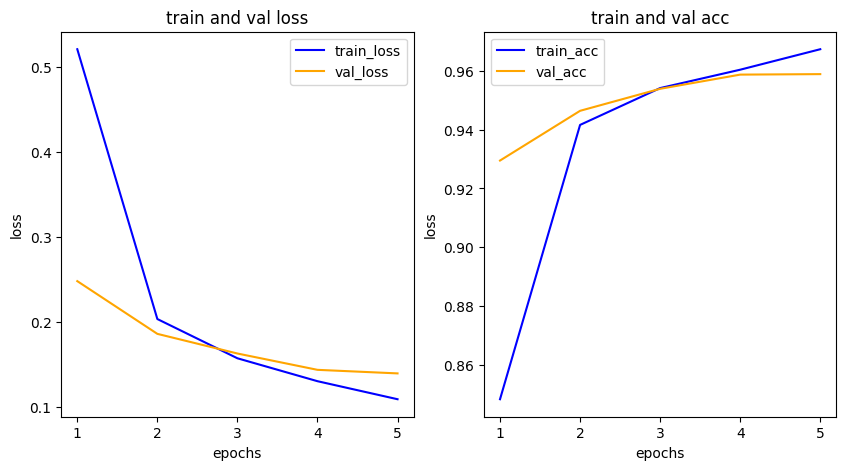

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

## 모델 수정 및 학습

In [ ]:
# 모델 구성
md_model = Sequential()
md_model.add(Dense(64, activation = 'relu', input_shape=(784, ))) # 첫번째 레이어 -> 반드시 입력을 넣어줘야함
md_model.add(Dense(32, activation = 'relu')) # hidden layer
md_model.add(Dense(10, activation = 'softmax'))

# 모델 설정
md_model.compile(optimizer='adam', # 옵티마이저
              loss = 'categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

# 모델 학습
history = md_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
329/329 [==============================] - 3s 7ms/step - loss: 0.5206 - acc: 0.8482 - val_loss: 0.2480 - val_acc: 0.9295
Epoch 2/5
329/329 [==============================] - 2s 6ms/step - loss: 0.2035 - acc: 0.9416 - val_loss: 0.1860 - val_acc: 0.9464
Epoch 3/5
329/329 [==============================] - 1s 4ms/step - loss: 0.1573 - acc: 0.9542 - val_loss: 0.1629 - val_acc: 0.9539
Epoch 4/5
329/329 [==============================] - 1s 4ms/step - loss: 0.1304 - acc: 0.9605 - val_loss: 0.1437 - val_acc: 0.9588
Epoch 5/5
329/329 [==============================] - 1s 4ms/step - loss: 0.1092 - acc: 0.9674 - val_loss: 0.1395 - val_acc: 0.9589


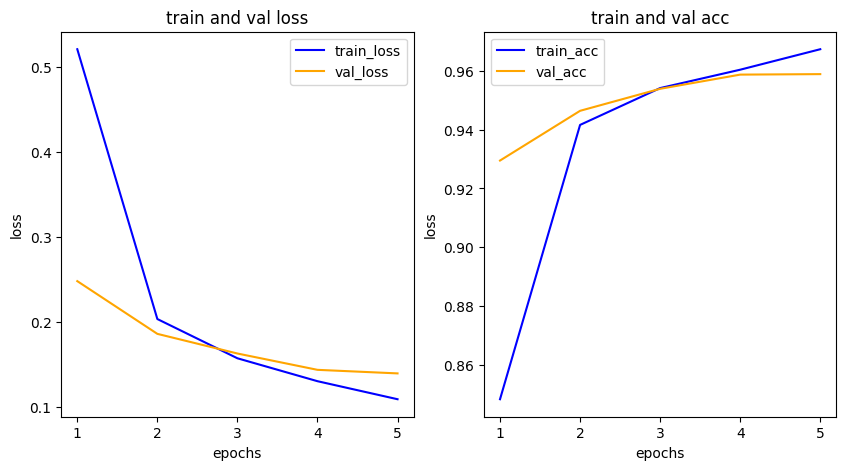

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

## 모델 평가하기

In [ ]:
md_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1254 - acc: 0.9602


[0.12541215121746063, 0.9602000117301941]

### 예측값을 그려서 손글씨 확인하기

313/313 [==============================] - 1s 1ms/step


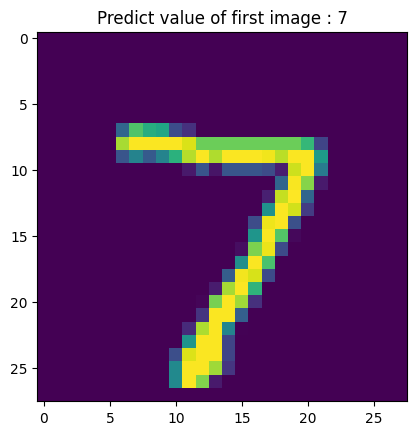

In [ ]:
results = md_model.predict(X_test)
arg_results = np.argmax(results, axis=1) # 가장 큰 값의 인덱스 확인

plt.imshow(X_test[0].reshape(28,28))
plt.title('Predict value of first image : '+ str(arg_results[0]))
plt.show()

313/313 [==============================] - 0s 1ms/step


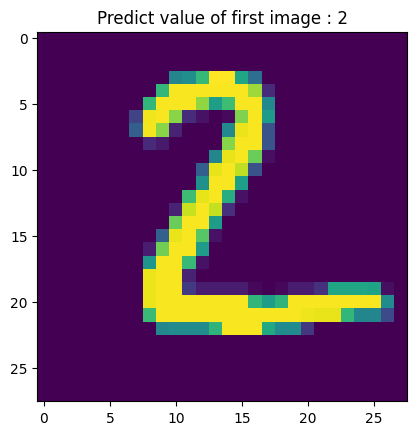

In [ ]:
results = md_model.predict(X_test)
arg_results = np.argmax(results, axis=1) # 가장 큰 값의 인덱스 확인

plt.imshow(X_test[1].reshape(28,28))
plt.title('Predict value of first image : '+ str(arg_results[1]))
plt.show()

## 모델 평가 방법 - 혼동 행렬


*   정확도가 떨어지는 (헷갈리는) 손글씨 확인
*   숫자 5에 대한 데이터를 추가 수집하여, 재학습



313/313 [==============================] - 0s 2ms/step


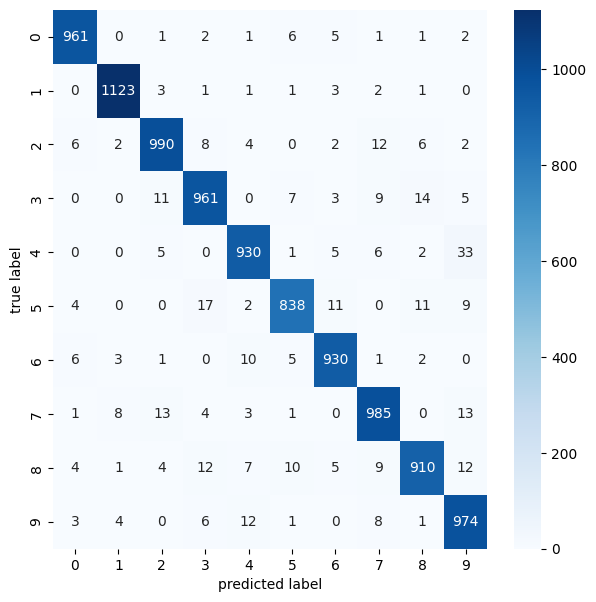

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 모델 예측
y_pred = md_model.predict(X_test)

# 혼동 행렬 그리기
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis =1), np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot=True, fmt= 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

## 모델 평가 방법 - 분류 보고서

In [ ]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = 1)))


               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.95      0.95      1010
           4       0.96      0.95      0.95       982
           5       0.96      0.94      0.95       892
           6       0.96      0.97      0.97       958
           7       0.95      0.96      0.96      1028
           8       0.96      0.93      0.95       974
           9       0.93      0.97      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## 모델 성능 평가 지표 확인

micro : 각각의 TP, FN, FP, TN 값들을 모두 합친 Total TP, FN, FP, TN 값들을 이용해 계산 <br>
macro : 각각의 클래스에 따라 TP, FN, FP, TN 값들을 이용해서 평가지표를 계산한 후 그 값들의 평균을 사용 <br>
weighted : 각 클래스에 해당하는 data 개수에 가중치를 주어 평균을 구하는 것

In [ ]:
from sklearn import metrics

# 모델 예측

results = md_model.predict(X_test)

y_pred = np.argmax(results, axis=1) # 예측
y_true = np.argmax(y_test, axis=1) # 실제 정답

pre_micro = metrics.precision_score(y_true, y_pred, average='micro')
pre_macro = metrics.precision_score(y_true, y_pred, average='macro')
pre_weighted = metrics.precision_score(y_true, y_pred, average='weighted')

print('precision_score')
print('micro : ', pre_micro)
print('macro : ', pre_macro)
print('weighted : ', pre_weighted)
print('-' * 50)

recall_micro = metrics.recall_score(y_true, y_pred, average='micro')
recall_macro = metrics.recall_score(y_true, y_pred, average='macro')
recall_weighted = metrics.recall_score(y_true, y_pred, average='weighted')

print('recall_score')
print('micro : ', recall_micro)
print('macro : ', recall_macro)
print('weighted : ', recall_weighted)
print('-' * 50)

f1_micro = metrics.f1_score(y_true, y_pred, average='micro')
f1_macro = metrics.f1_score(y_true, y_pred, average='macro')
f1_weighted = metrics.f1_score(y_true, y_pred, average='weighted')

print('f1_score')
print('micro : ', f1_micro)
print('macro : ', f1_macro)
print('weighted : ', f1_weighted)
print('-' * 50)

313/313 [==============================] - 1s 2ms/step
precision_score
micro :  0.9602
macro :  0.960121754280277
weighted :  0.9603183412745185
--------------------------------------------------
recall_score
micro :  0.9602
macro :  0.959588317856545
weighted :  0.9602
--------------------------------------------------
f1_score
micro :  0.9602
macro :  0.9597785334743433
weighted :  0.9601843795861691
--------------------------------------------------
